Loading Data

In [108]:
# read data from .arff files
import os

import sktime
from sktime.datasets import load_from_tsfile
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# load data from .csv using pd
def load_data(path):

    # load data from .csv
    data = pd.read_csv(path, header=None)

    # get labels
    y = data.iloc[:, -1].values

    # get features
    X = data.iloc[:, :-1].values

    # return features and labels
    return X, y

Loading MITBIH DATA

In [109]:
# Load mitbih data
train_x_mitbih, train_y_mitbih = load_data(
    "./datasets/ecg/mitbih_train.csv"
)
test_x_mitbih, test_y_mitbih = load_data(
    "./datasets/ecg/mitbih_test.csv"
)


Loading PTBDB DATA

In [110]:
# load ptbdb data 
ptbdb_normal_x, ptbdb_normal_y = load_data(
    "./datasets/ecg/ptbdb_normal.csv"
)

ptbdb_abnormal_x, ptbdb_abnormal_y = load_data(
    "./datasets/ecg/ptbdb_abnormal.csv"
)

# merge the data and labels
x_ptbdb = np.concatenate((ptbdb_normal_x, ptbdb_abnormal_x))
y_ptbdb = np.concatenate((ptbdb_normal_y, ptbdb_abnormal_y))

# split the data into train and test using 
train_x_ptbdb, test_x_ptbdb, train_y_ptbdb, test_y_ptbdb = train_test_split(x_ptbdb, y_ptbdb, test_size=0.33, random_state=42)



PTBDB DATA VISUALIZATION

<Axes: title={'center': 'Train data ptbdb'}>

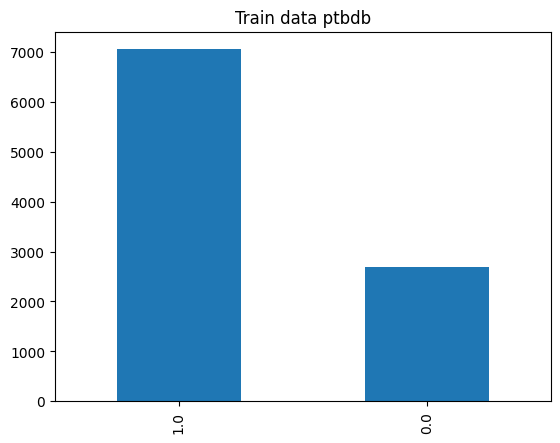

In [111]:
# Train data ptbdb

# create a dataframe from the data and labels 
df_train_ptbdb = pd.DataFrame(train_x_ptbdb)
df_train_ptbdb['label'] = train_y_ptbdb

# create a plot bar from the dataframe using pandas.plot.bar
df_train_ptbdb['label'].value_counts().plot.bar(title = "Train data ptbdb")


<Axes: title={'center': 'Test data ptbdb'}>

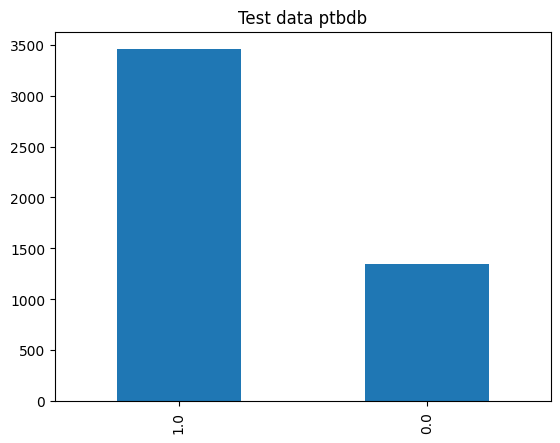

In [112]:
# Test data ptbdb

# create a dataframe from the data and labels 
df_test_ptbdb = pd.DataFrame(test_x_ptbdb)
df_test_ptbdb['label'] = test_y_ptbdb

# create a plot bar from the dataframe using pandas.plot.bar
df_test_ptbdb['label'].value_counts().plot.bar(title = "Test data ptbdb")


<Axes: title={'center': 'Train and Test data ptbdb'}>

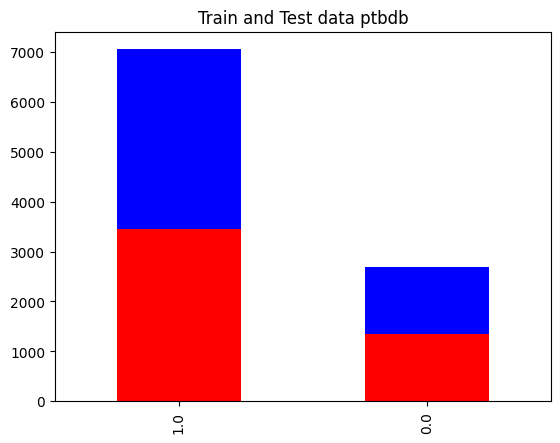

In [113]:
# put test_df and train_df on the same plot bar with different colors 
df_train_ptbdb['label'].value_counts().plot.bar(title = "Train and Test data ptbdb", color = 'blue', alpha = 1)
df_test_ptbdb['label'].value_counts().plot.bar(color = 'red', alpha = 1)

In [114]:
ptbdb_labels = df_train_ptbdb['label'].unique()
counts_train = df_train_ptbdb['label'].value_counts()
counts_test= df_test_ptbdb['label'].value_counts()


print("----------------------------------")
print("TRAIN: "+  str(counts_train))
print("----------------------------------")
print("TEST: " + str(counts_test))

----------------------------------
TRAIN: 1.0    7052
0.0    2697
Name: label, dtype: int64
----------------------------------
TEST: 1.0    3454
0.0    1349
Name: label, dtype: int64


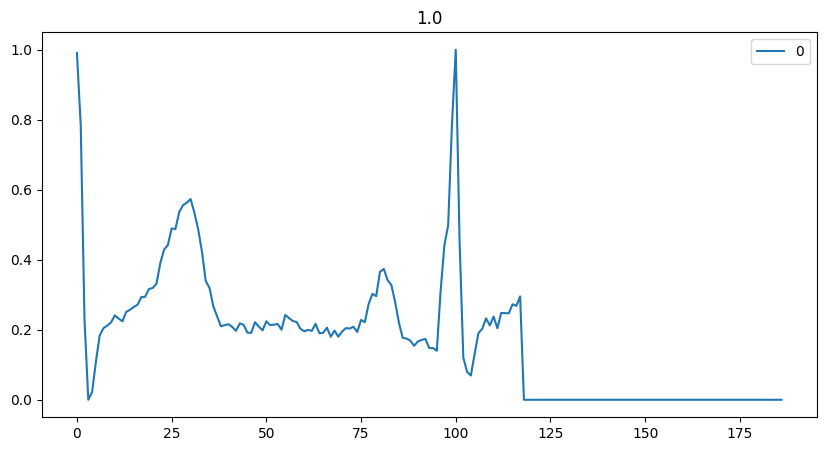

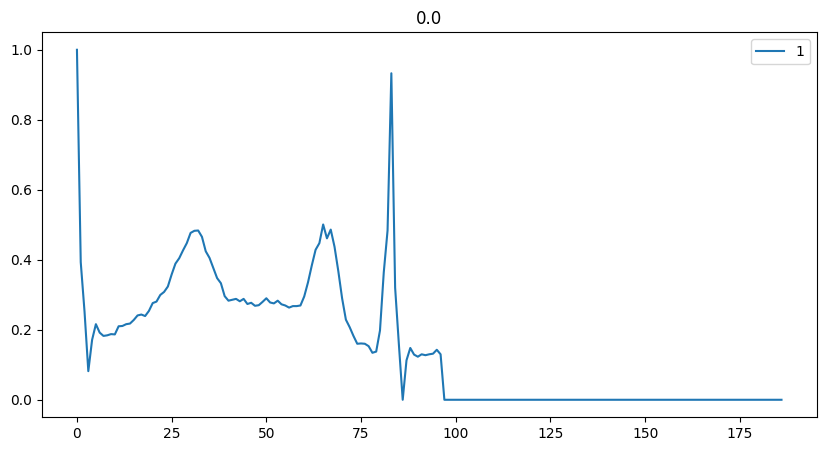

In [115]:
# for each label, plot the data#
for label in ptbdb_labels:
    current = df_train_ptbdb[df_train_ptbdb['label'] == label].iloc[0]

    # create a dataframe from the data and labels
    current_df = pd.DataFrame(current)
    current_df = current_df.drop('label', axis = 0)
    current_df.plot(title = str(label), figsize = (10, 5))
    

MITBIH DATA VISUALIZATION

<Axes: title={'center': 'Train data mitbih'}>

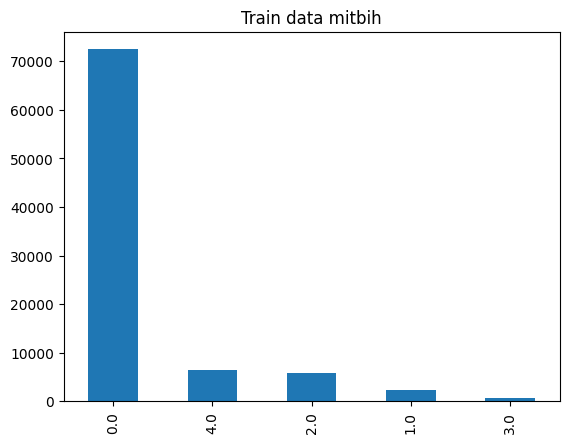

In [116]:
# Train data mitbih

# create a dataframe from the data and labels 
train_df_mitbih = pd.DataFrame(train_x_mitbih)
train_df_mitbih['label'] = train_y_mitbih

# create a plot bar from the dataframe using pandas.plot.bar
train_df_mitbih['label'].value_counts().plot.bar(title = "Train data mitbih")

<Axes: title={'center': 'Train data mitbih'}>

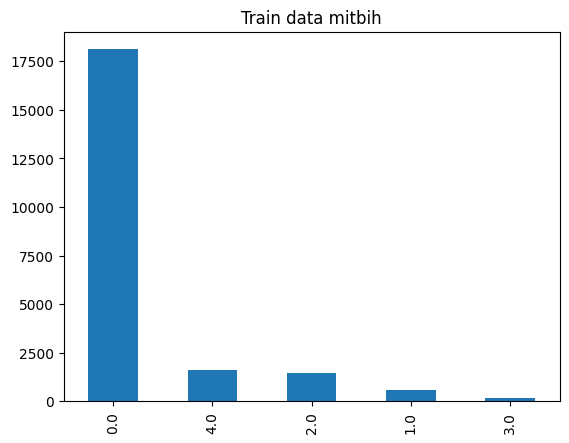

In [117]:
# Test data mitbih

# create a dataframe from the data and labels 
test_df_mitbih = pd.DataFrame(test_x_mitbih)
test_df_mitbih['label'] = test_y_mitbih

# create a plot bar from the dataframe using pandas.plot.bar
test_df_mitbih['label'].value_counts().plot.bar(title = "Train data mitbih")

<Axes: title={'center': 'Train and Test data'}>

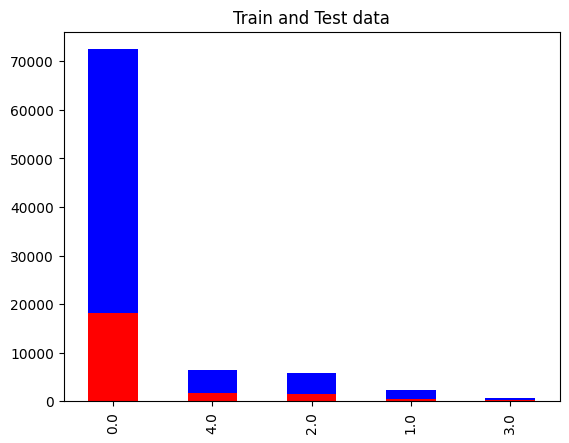

In [118]:
# put test_df and train_df on the same plot bar with different colors 
train_df_mitbih['label'].value_counts().plot.bar(title = "Train and Test data", color = 'blue', alpha = 1)
test_df_mitbih['label'].value_counts().plot.bar(color = 'red', alpha = 1)


In [119]:
# extract unique labels from the data
mitbih_labels = train_df_mitbih['label'].unique()
counts_train = train_df_mitbih['label'].value_counts()
counts_test= test_df_mitbih['label'].value_counts()


print(mitbih_labels)
print("----------------------------------")
print("TRAIN: "+  str(counts_train))
print("----------------------------------")
print("TEST: " + str(counts_test))

[0. 1. 2. 3. 4.]
----------------------------------
TRAIN: 0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: label, dtype: int64
----------------------------------
TEST: 0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: label, dtype: int64


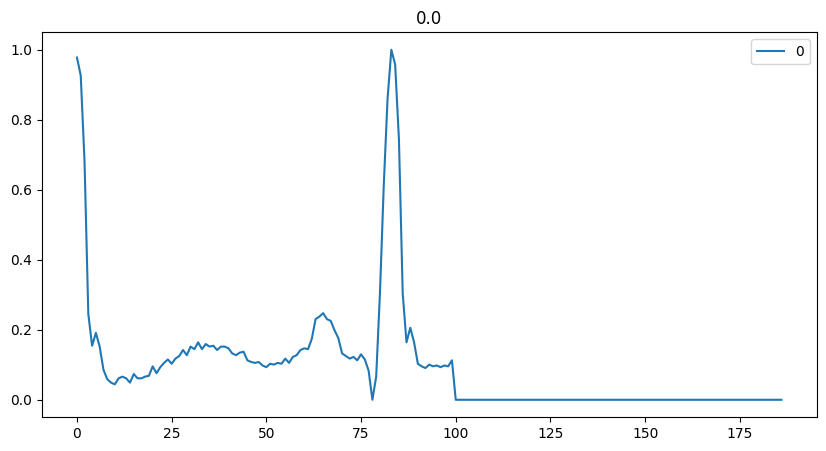

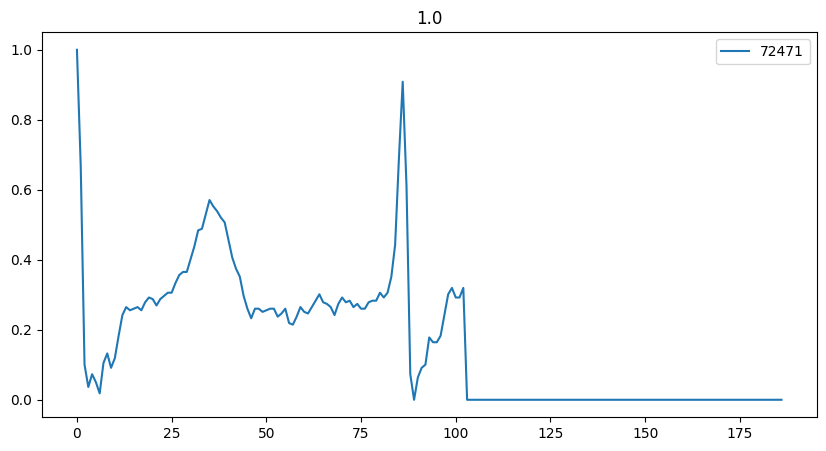

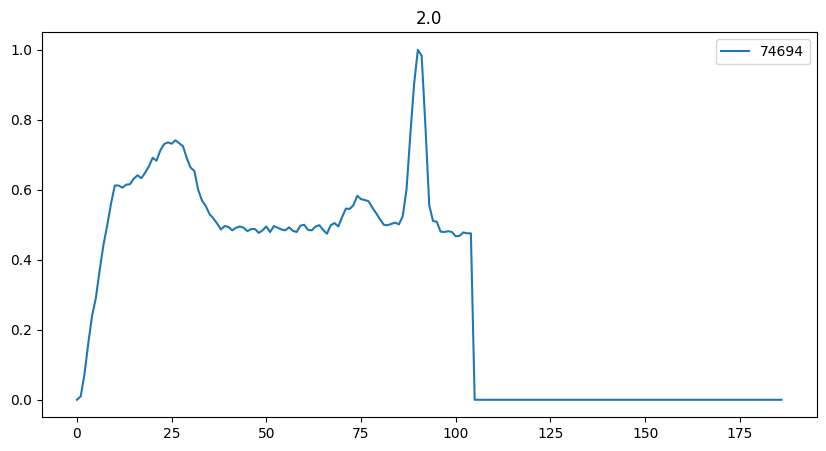

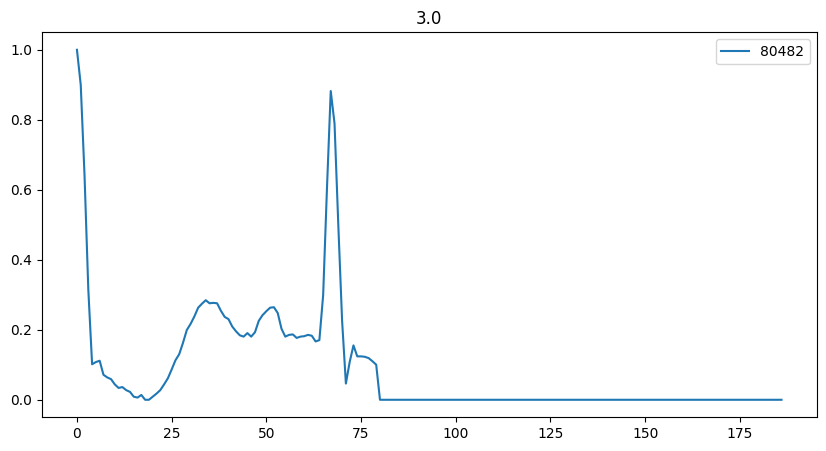

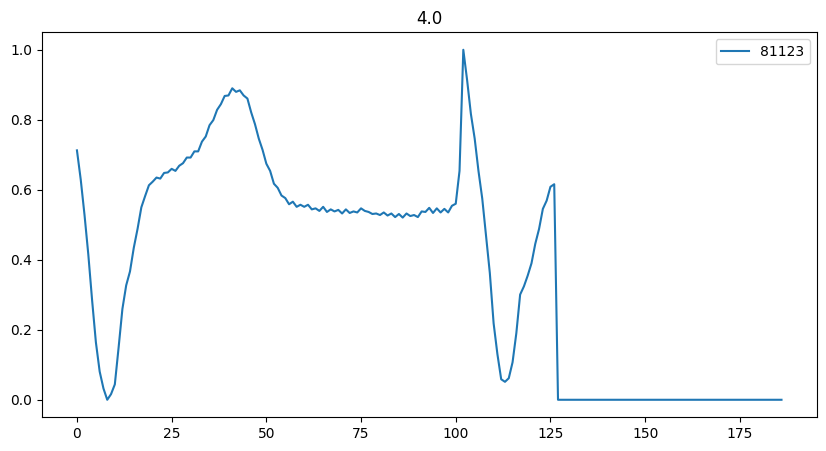

In [120]:
# for each label, plot the data#
for label in mitbih_labels:
    current = train_df_mitbih[train_df_mitbih['label'] == label].iloc[0]

    # create a dataframe from the data and labels
    current_df = pd.DataFrame(current)
    current_df = current_df.drop('label', axis = 0)
    current_df.plot(title = str(label), figsize = (10, 5))
    

MEDIA SI DEVIATIA STANDARD PER UNITATE DE TIMP

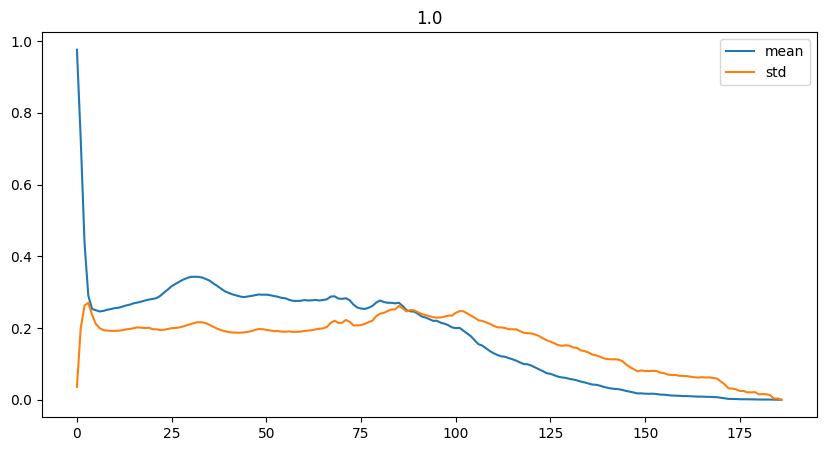

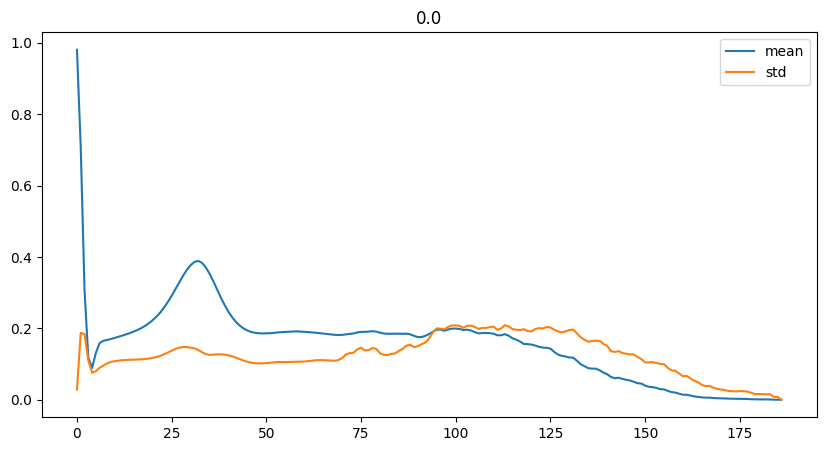

In [121]:
# Media si deviatia standard pt fiecare label pt mitbih
from matplotlib import pyplot as plt


for label in ptbdb_labels:
    current = df_train_ptbdb[df_train_ptbdb['label'] == label]

    # create a dataframe from the data and labels
    current_df = pd.DataFrame(current)
    current_df = current_df.drop('label', axis = 1)
    current_df_mean = current_df.mean()
    current_df_std = current_df.std()
    current_df_mean.plot(title = str(label), figsize = (10, 5))
    current_df_std.plot(title = str(label), figsize = (10, 5))

    # end plot
    plt.legend(['mean', 'std'])
    plt.show()

    

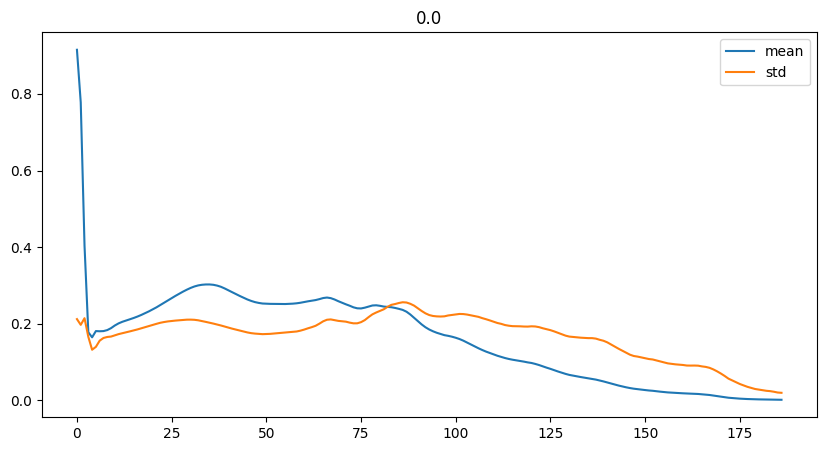

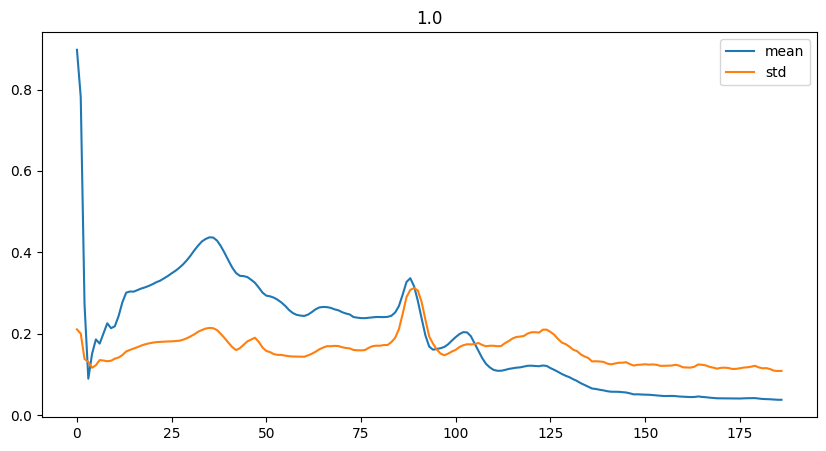

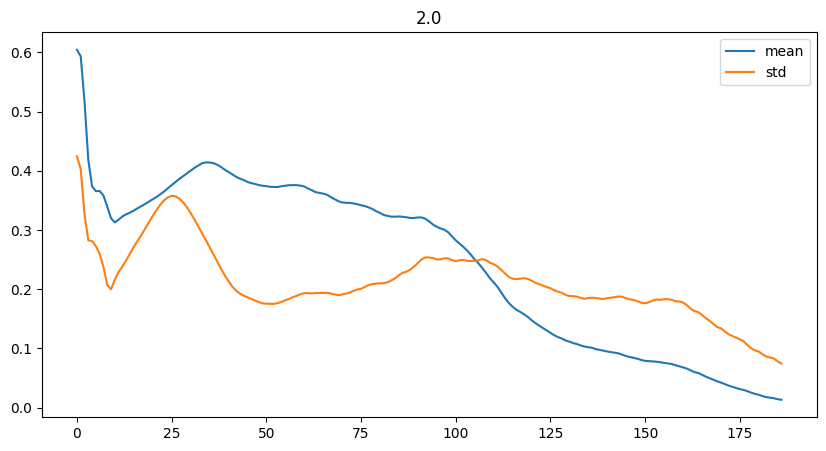

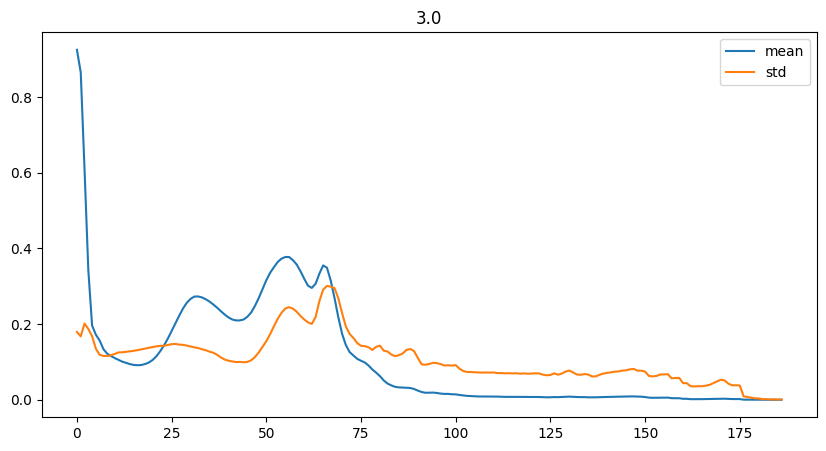

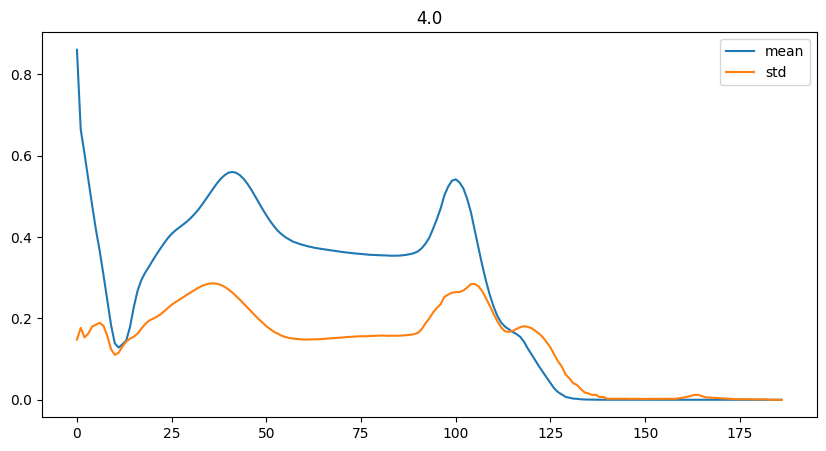

In [122]:
# Media si deviatia standard pt fiecare label pt mitbih
from matplotlib import pyplot as plt


for label in mitbih_labels:
    current = train_df_mitbih[train_df_mitbih['label'] == label]

    # create a dataframe from the data and labels
    current_df = pd.DataFrame(current)
    current_df = current_df.drop('label', axis = 1)
    current_df_mean = current_df.mean()
    current_df_std = current_df.std()
    current_df_mean.plot(title = str(label), figsize = (10, 5))
    current_df_std.plot(title = str(label), figsize = (10, 5))

    # end plot
    plt.legend(['mean', 'std'])
    plt.show()

    